In [373]:
import math
import numpy as np
from scipy import *
import matplotlib.pyplot as plt
from spatialmath import *
from spatialmath.base import *
from spatialmath.base import sym
from spatialgeometry import *
from roboticstoolbox import *

### Tutorial 04 Forward Kinematics

#### 1  Combined Transformations

A point $P$ with coordinates $[7, 3, 1]^T$ is attached to a frame $F$ which is subject to the following 3 successive transformations relative to the reference frame $F_{xyz}$:
1. Rotation of $90^o$ about the z-axis.
2. Followed by a rotation of $90^o$ about the y-axis.
3. Followed by a translation of $[4, −3, 7]$.
Find manually (using a calculator, you could use one of the software implemented calculators)
the coordinates of the point relative to the reference frame after all the transformations have
taken place.
Verify your calculations by using Python and doing the same calculations using matrices.
Hints: See the lecture 4 slides. The order of the matrices written (calculated) is the opposite
of the order of transformations performed. The result should calculate to $[5, 4, 10, 1]$.

---

**Step 1: Rotation of 90 degrees about the z-axis**

Create hom. transf matrix, $R_z(90)$:

$$
\begin{equation}
\begin{pmatrix}
  cos(90)  & -sin(90) & 0 & 0 \\
  sin(90)  & cos(90)  & 0 & 0 \\
  0        & 0        & 1 & 0 \\
  0        & 0        & 0 & 1 \\
\end{pmatrix}
\end{equation}
$$

Point $P * R_z(90) = P'$

$$
\begin{equation}
\begin{pmatrix}
  7 \\
  3 \\
  1 \\
  1 \\
\end{pmatrix}
* 
\begin{pmatrix}
  0  & -1 & 0 & 0 \\
  1  & 0  & 0 & 0 \\
  0        & 0        & 1 & 0 \\
  0        & 0        & 0 & 1 \\
\end{pmatrix}
\end{equation}
$$

In [109]:


P = [7,3,1,1]

tr1 = trotz(math.radians(90))
tr2 = troty(math.radians(90))
tr3 =  transl(4,-3,7)

result = tr3@tr2@tr1@P

print(result)

[ 5.  4. 10.  1.]


---

#### 2 DH Matrix Derivation
Consider the following DH table:

|Joint | $\theta$ | d | r | $\alpha$
| --   | --| --| --|--
|1 | $\theta$  |d |r | $\alpha$

1. Use Python to derive the DH matrix by applying the 4 basic transformations shown on
the left hand side of Equation (6) of the last lecture.
Use SymPy to create the corresponding symbols before creating the 4 basic matrix transformations.
2. Check that your calculated DH matrix matches with the one shown on the right hand side
of Equation (7) of the last lecture slides.

In [219]:
from sympy import *

theta = Symbol('theta')
d = Symbol('d')
r = Symbol('r')
alpha = Symbol('alpha')

result = trotz(theta) @ transl(0,0,d) @ transl(r,0,0) @ trotx(alpha)
simplify(result)

[[cos(theta), -sin(theta)*cos(alpha), sin(alpha)*sin(theta), r*cos(theta)], [sin(theta), cos(alpha)*cos(theta), -sin(alpha)*cos(theta), r*sin(theta)], [0, sin(alpha), cos(alpha), d], [0, 0, 0, 1]]

#### 3 DH Matrix
Consider a 2-joint robot with the following DH table:

|Joint | $\theta$ | d | r | $\alpha$
| --   | --| --| --|--
|1 | $\theta_1$  |$d_1$ |$r_1$ | $\alpha_1$
|2 | $\theta_2$  |$d_2$ |$r_2$ | $\alpha_2$

Determine the position of the robot’s end-effector. Use symbolic Python (SymPy) for the
calculations.

In [371]:
from sympy import *

theta1 = Symbol('theta_1')
d1 = Symbol('d_1')
r1 = Symbol('r_1')
alpha1 = Symbol('alpha_1')

result_1 = trotz(theta1) @ transl(0,0,d1) @ transl(r1,0,0) @ trotx(alpha1)
#print(result_1)

theta2 = Symbol('theta_2')
d2 = Symbol('d_2')
r2 = Symbol('r_2')
alpha2 = Symbol('alpha_2')

result_2 = trotz(theta2) @ transl(0,0,d2) @ transl(r2,0,0) @ trotx(alpha2)

final_res = result_1 * result_2

simplify(final_res)


[[cos(theta_1)*cos(theta_2), sin(theta_1)*sin(theta_2)*cos(alpha_1)*cos(alpha_2), sin(alpha_1)*sin(alpha_2)*sin(theta_1)*sin(theta_2), r_1*r_2*cos(theta_1)*cos(theta_2)], [sin(theta_1)*sin(theta_2), cos(alpha_1)*cos(alpha_2)*cos(theta_1)*cos(theta_2), sin(alpha_1)*sin(alpha_2)*cos(theta_1)*cos(theta_2), r_1*r_2*sin(theta_1)*sin(theta_2)], [0, sin(alpha_1)*sin(alpha_2), cos(alpha_1)*cos(alpha_2), d_1*d_2], [0, 0, 0, 1]]

#### 4 3-DOF Robot - Forward Kinematics Problem
Consider the 3-DOF robot shown in Figure 1. Its DH table is given by:

|Joint | $\theta$ | d | r | $\alpha$
| --   | --| --| --|--
|1 | $\theta_1$  |$0$ |$r_1$ | $0$
|2 | $90+\theta_2$  |$0$ |$0$ | $90$
|3 | $\theta_3$ | $d_3$ | $0$ | $0$

Determine the position of the robot’s end-effector. Use symbolic Python for the calculations.
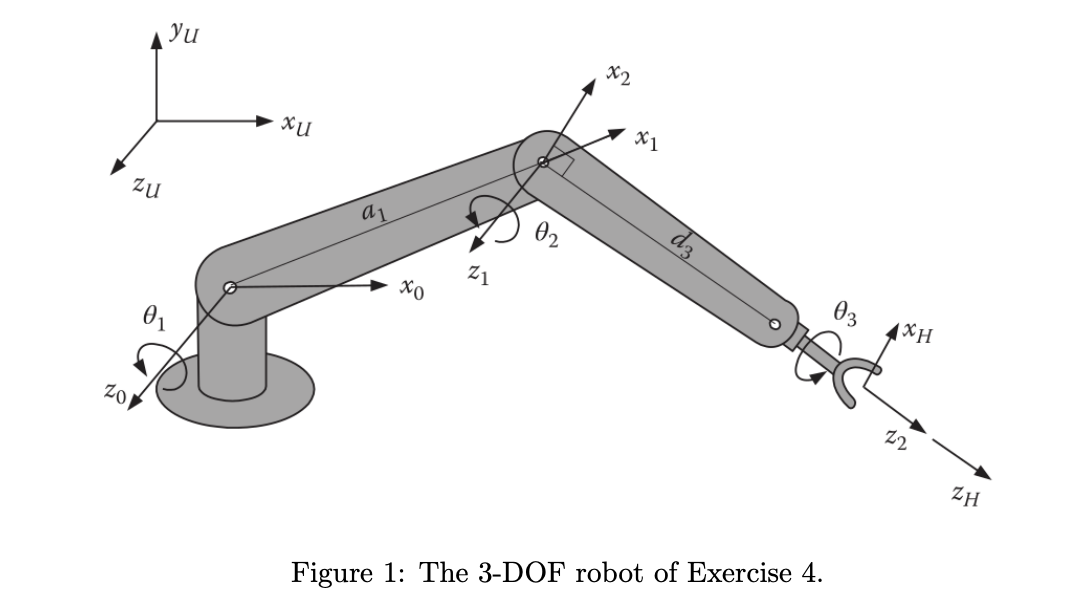

In [369]:
from sympy import *

theta1 = Symbol('theta_1')
d1 = Symbol('d1')
r1 = Symbol('r_1')
alpha1 = Symbol('alpha_1')

result_1 = trotz(theta1) @ transl(0,0,0) @ transl(r1,0,0) @ trotx(0)
#print(result_1)

theta2 = Symbol('theta_2')
d2 = Symbol('d_2')
r2 = Symbol('r_2')
alpha2 = Symbol('alpha_2')

result_2 = trotz(math.radians(90) + theta2) @ transl(0,0,0) @ transl(0,0,0) @ trotx(90)

theta3 = Symbol('theta_3')
d3 = Symbol('d_3')
r3 = Symbol('r_3')
alpha3 = Symbol('alpha_3')

result_3 = trotz(theta3) @ transl(0,0,d3) @ transl(0,0,0) @ trotx(0)

final_res = result_1 * result_2 * result_3

simplify(final_res)



[[1.0*cos(theta_1)*cos(theta_3)*cos(theta_2 + 1.5707963267949), 0.44807361612917*sin(theta_1)*sin(theta_3)*sin(theta_2 + 1.5707963267949), 0, 0], [1.0*sin(theta_1)*sin(theta_3)*sin(theta_2 + 1.5707963267949), -0.44807361612917*cos(theta_1)*cos(theta_3)*cos(theta_2 + 1.5707963267949), 0, 0], [0, 0, -0.44807361612917, 0], [0, 0, 0, 1.0]]

#### 5 Python Programming
Write a Python function (see Week 1) which accepts 4 arguments: $θ, d, r, α$ and returns the DH
matrix corresponding to these parameters for a single robot joint.

In [367]:
def dh_matrix(theta,d,r,alpha):
    result = trotz(theta) @ transl(0,0,d) @ transl(r,0,0) @ trotx(alpha)
    return simplify(result)

dh_matrix(90,0,0,0)

[[-0.44807361612917, -0.893996663600558, 0.0, 0.0], [0.893996663600558, -0.44807361612917, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]]

In [ ]:
t_ = [theta_1, theta_2, theta_3, theta_4, theta_5, theta_6]
r_ = [0, 0, r_2, r_3, 0, 0]
d_ = [0, 0, d_3, d_4, 0, 0]
a_ = [0, -math.radians(90), 0, -math.radians(90), math.radians(90), -math.radians(90)]

In [562]:
theta_1 = Symbol('theta_1')
theta_2 = Symbol('theta_2')
theta_3 = Symbol('theta_3')
theta_4 = Symbol('theta_4')
theta_5 = Symbol('theta_5')
theta_6 = Symbol('theta_6')

r_2 = Symbol('r_2')
r_3 = Symbol('r_3')

d_3 = Symbol('d_3')
d_4 = Symbol('d_4')


def dh_matrix(theta,d,r,alpha):        
        result = trotz(theta) @ transl(0,0,d) @ transl(r,0,0) @ trotx(alpha)
        return result

t_l = [theta_1, theta_2, theta_3, theta_4, theta_5, theta_6]
r_l= [0, 0, r_2, r_3, 0, 0]
d_l = [0, 0, d_3, d_4, 0, 0]
a_l = [0, -math.radians(90), 0, -math.radians(90), math.radians(90), -math.radians(90)]


for i in range(6):
    t = t_l[i]
    r = r_l[i]
    d = d_l[i]
    a = a_l[i]
    
    result = dh_matrix(t,d,r,a)
    print(result)
    print('\n')

    sum = sum * result
    
#simplify(result)
print("Total DH Transformation Matrix:")
simplify(sum)


[[1.0*cos(theta_1) -1.0*sin(theta_1) 0 0]
 [1.0*sin(theta_1) 1.0*cos(theta_1) 0 0]
 [0.0 0.0 1.0 0.0]
 [0.0 0.0 0.0 1.0]]


[[1.0*cos(theta_2) -6.12323399573677e-17*sin(theta_2) -1.0*sin(theta_2) 0]
 [1.0*sin(theta_2) 6.12323399573677e-17*cos(theta_2) 1.0*cos(theta_2) 0]
 [0.0 -1.0 6.123233995736766e-17 0.0]
 [0.0 0.0 0.0 1.0]]


[[1.0*cos(theta_3) -1.0*sin(theta_3) 0 1.0*r_2*cos(theta_3)]
 [1.0*sin(theta_3) 1.0*cos(theta_3) 0 1.0*r_2*sin(theta_3)]
 [0 0 1.00000000000000 1.0*d_3]
 [0 0 0 1.00000000000000]]


[[1.0*cos(theta_4) -6.12323399573677e-17*sin(theta_4) -1.0*sin(theta_4)
  1.0*r_3*cos(theta_4)]
 [1.0*sin(theta_4) 6.12323399573677e-17*cos(theta_4) 1.0*cos(theta_4)
  1.0*r_3*sin(theta_4)]
 [0 -1.00000000000000 6.12323399573677e-17 1.0*d_4]
 [0 0 0 1.00000000000000]]


[[1.0*cos(theta_5) -6.12323399573677e-17*sin(theta_5) 1.0*sin(theta_5) 0]
 [1.0*sin(theta_5) 6.12323399573677e-17*cos(theta_5) -1.0*cos(theta_5) 0]
 [0.0 1.0 6.123233995736766e-17 0.0]
 [0.0 0.0 0.0 1.0]]


[[1.0*co

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

In [576]:
def dh_matrix(theta,d,r,alpha):        
        result = trotz(theta) @ transl(0,0,d) @ transl(r,0,0) @ trotx(alpha)
        return result

theta_1 = Symbol('theta_1')
theta_2 = Symbol('theta_2')
theta_3 = Symbol('theta_3')
theta_4 = Symbol('theta_4')
theta_5 = Symbol('theta_5')
theta_6 = Symbol('theta_6')

r_2 = Symbol('r_2')
r_3 = Symbol('r_3')

d_3 = Symbol('d_3')
d_4 = Symbol('d_4')




t_l = [theta_1, theta_2, theta_3, theta_4, theta_5, theta_6]
r_l= [0, 0, r_2, r_3, 0, 0]
d_l = [0, 0, d_3, d_4, 0, 0]
a_l = [0, -math.radians(90), 0, -math.radians(90), math.radians(90), -math.radians(90)]


for i in range(6):
    t = t_l[i]
    r = r_l[i]
    d = d_l[i]
    a = a_l[i]
    
    dh_result = dh_matrix(t,d,r,a)
    print(dh_result)
    #sum = sum @ dh_result
    
print("Total DH Transformation Matrix:")


[[1.0*cos(theta_1) -1.0*sin(theta_1) 0 0]
 [1.0*sin(theta_1) 1.0*cos(theta_1) 0 0]
 [0.0 0.0 1.0 0.0]
 [0.0 0.0 0.0 1.0]]
[[1.0*cos(theta_2) -6.12323399573677e-17*sin(theta_2) -1.0*sin(theta_2) 0]
 [1.0*sin(theta_2) 6.12323399573677e-17*cos(theta_2) 1.0*cos(theta_2) 0]
 [0.0 -1.0 6.123233995736766e-17 0.0]
 [0.0 0.0 0.0 1.0]]
[[1.0*cos(theta_3) -1.0*sin(theta_3) 0 1.0*r_2*cos(theta_3)]
 [1.0*sin(theta_3) 1.0*cos(theta_3) 0 1.0*r_2*sin(theta_3)]
 [0 0 1.00000000000000 1.0*d_3]
 [0 0 0 1.00000000000000]]
[[1.0*cos(theta_4) -6.12323399573677e-17*sin(theta_4) -1.0*sin(theta_4)
  1.0*r_3*cos(theta_4)]
 [1.0*sin(theta_4) 6.12323399573677e-17*cos(theta_4) 1.0*cos(theta_4)
  1.0*r_3*sin(theta_4)]
 [0 -1.00000000000000 6.12323399573677e-17 1.0*d_4]
 [0 0 0 1.00000000000000]]
[[1.0*cos(theta_5) -6.12323399573677e-17*sin(theta_5) 1.0*sin(theta_5) 0]
 [1.0*sin(theta_5) 6.12323399573677e-17*cos(theta_5) -1.0*cos(theta_5) 0]
 [0.0 1.0 6.123233995736766e-17 0.0]
 [0.0 0.0 0.0 1.0]]
[[1.0*cos(theta_6)